# Calculating waveguide dispersion delay
The cut off frequency for a waveguide is given by

$$f_c = \frac{1}{2\sqrt{\mu\epsilon}} \sqrt{\left(\frac{m}{a}\right)^2 + \left(\frac{n}{b}\right)^2}$$

where m, n are the propagation modes, a, b are the sides of the rectangular waveguide (a is longest by convention).

The wave group velocity inside a waveguide is given by

$$ v_g = v\sqrt{1-\frac{f_c^2}{f^2}}$$

Where $f_c$ is the cut off frequency, v is the wave speed in the medium (c in vacuum) and f is the waveg frequency.

The delay $\tau_g$ of a wave propagating along a waveguide of distance $l$ is given by

$$\tau_g = \tau_{wg}-\tau_{vacuum}$$

$$\tau_{wg,vacuum} = \frac{l}{v_g, c}$$



In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import constants as konst

import sys
#sys.path.append('../')
import skreflectometry

from skreflectometry import waveguides as waveguides

%matplotlib inline


ImportError: cannot import name waveguides

In [11]:
waveguide = "WR-15"
size = 50
wg_length = 4
wg_length1 = 3
a,b = waveguides.get_dimensions(waveguide)
f = waveguides.get_frequencies(waveguide, size=size)
fc = waveguides.cutoff(a)
vg = waveguides.group_velocity(f,fc=fc)

delay = waveguides.propagation_delay(vg, wg_length )
delay1 = waveguides.propagation_delay(vg, wg_length1 )

Text(0,0.5,u'Group velocity [m/s]')

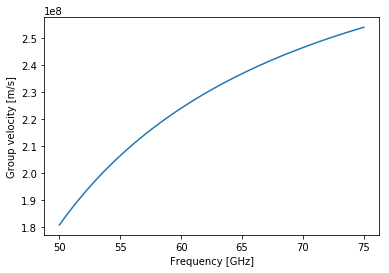

In [3]:
plt.plot(f/1e9,vg)
plt.xlabel('Frequency [GHz]')
plt.ylabel('Group velocity [m/s]')

max delay 2.21065762199e-08
min delay 1.57521951356e-08
delta delay 6.35438108423e-09
fb 6.35438108423 MHz


5.526644054964563e-09

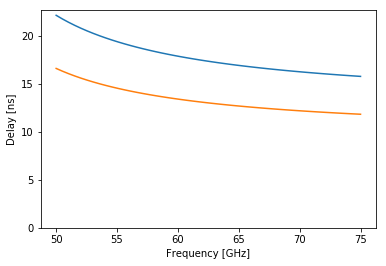

In [14]:
plt.plot(f/1e9,delay*1e9)
plt.plot(f/1e9,delay1*1e9)
plt.xlabel('Frequency [GHz]')
plt.ylabel('Delay [ns]')
plt.ylim(ymin=0)

maxdg = delay.max()
mindg =  delay.min()
deltadg = delay.max()-delay.min()
swr = 25e9/25e-6
deltafb = swr*deltadg


print "max delay", maxdg
print "min delay", mindg
print "delta delay", deltadg
print "fb", deltafb/1e6, "MHz"
(delay-delay1).max()

In [3]:
def calc_waveguide_group_velocity(f, fc=31.3905e9, v=konst.c):
    """
    Calculates group velocity for a given waveguide with cut off frequency fc
    Default parameters for U-band
    Parameters
    ----------
    f : array float
        Frequency for which to get group velocities
    fc : float
        Waveguide cut off frequency
    v : float (default: c)
        Velocity of wave in unbounded medium
        
    Returns
    -------
    vg : array float
        Group velocity for each of the frequencies
    """
    vg = v*np.sqrt(1-(np.power(fc/f,2)))
    return vg

def calc_waveguide_delay(f, length, **kwargs):
    """
    Calculates waveguide delay for a given frequency over a waveguide of length
    
    Parameters
    ----------
    f : array float
        Frequency array
    length : float
        Length of waveguides
    **kwargs
        Arguments to pass onto calc_waveguide_group_velocity
    
    Returns
    -------
    delay : array float
        Delays given for each frequency
    """

    #delay_vacuum = length/konst.c
    vg = calc_waveguide_group_velocity(f, **kwargs)
    delay_waveguide = length/vg
    #delay = delay_waveguide#-delay_vacuum
    return delay_waveguide
    

In [4]:
wg_length = 10 # meter
f = np.linspace(40e9,70e9,50)


## Plotting group velocity

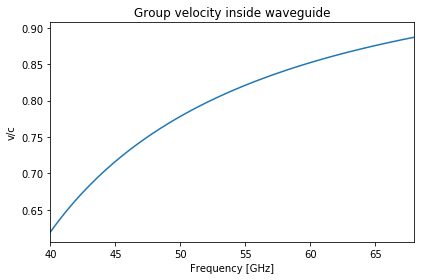

In [5]:
vg = calc_waveguide_group_velocity(f)
plt.plot(f/1e9,vg/konst.c)
plt.ylabel(r'v/c')
plt.xlabel('Frequency [GHz]')


plt.title('Group velocity inside waveguide')
plt.xlim(40,68)
plt.tight_layout()
plt.show()

## Wave propagation delays in different waveguide lengths

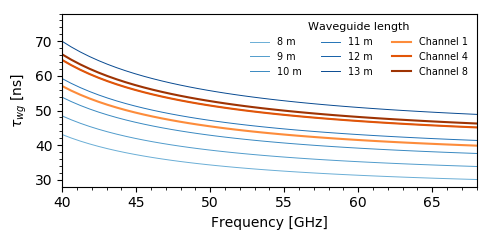

In [52]:
wg_length = 10 # meter
f = np.linspace(40e9,70e9,50)

plt.figure(figsize=(5,2.5),dpi=100)


wg_lengths = [8,9,10,11,12,13]
n = len(wg_lengths)
color = plt.cm.viridis(np.linspace(0.1,0.9,n))
color = plt.cm.Blues(np.linspace(0.5,0.9,n))

for i, wg_length in enumerate(wg_lengths):
    delay = calc_waveguide_delay(f, wg_length)
    plt.plot(f/1e9,delay*1e9, label='%0.0f m'%(wg_length), linestyle='-',color=color[i],lw=0.7)


channel = [1,4,8]
wg_lengths = [10.6,12.,12.3]
n = len(wg_lengths)
color = plt.cm.Oranges(np.linspace(0.5,0.9,n)) 

for i, wg_length in enumerate(wg_lengths):
    delay = calc_waveguide_delay(f, wg_length)
    plt.plot(f/1e9,delay*1e9, label='Channel %d'%(channel[i]),color=color[i],lw=1.5)

plt.legend(title='Waveguide length', fontsize='x-small',ncol=3,frameon=False).get_title().set_fontsize(8)
plt.ylabel(r'$\tau_{wg}$ [ns]')
plt.xlabel('Frequency [GHz]')

#plt.title('Wave delays introduced in different waveguide ')
plt.xlim(40,68)
plt.ylim(28,78)
plt.minorticks_on()
plt.tight_layout()
plt.savefig('../../images/fig_generic_waveguide_dispersion_delay.pdf',dpi=300)
plt.show()

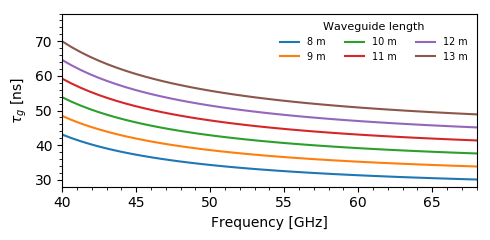

In [10]:
wg_length = 10 # meter
f = np.linspace(40e9,70e9,50)

plt.figure(figsize=(5,2.5),dpi=100)
wg_lengths = [8,9,10,11,12,13]
for wg_length in wg_lengths:
    delay = calc_waveguide_delay(f, wg_length)
    plt.plot(f/1e9,delay*1e9, label='%0.0f m'%(wg_length))

plt.legend(title='Waveguide length', fontsize='x-small',ncol=3,frameon=False).get_title().set_fontsize(8)
plt.ylabel(r'$\tau_g$ [ns]')
plt.xlabel('Frequency [GHz]')

#plt.title('Wave delays introduced in different waveguide ')
plt.xlim(40,68)
plt.ylim(28,78)
plt.minorticks_on()
plt.tight_layout()
plt.savefig('../../images/fig_generic_waveguide_dispersion_delay.pdf',dpi=300)
plt.show()